In [1]:
!ls

Challenge1.ipynb  Word_University_Rank_2020.csv


In [2]:
# Libraries: Standard ones
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Library for boxplots
import seaborn as sns

# K-means function
from sklearn.cluster import KMeans

# Function to standardize the data 
from sklearn.preprocessing import scale

# Functions for silhouette
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [3]:
def plot_corr(corr):
    # https://seaborn.pydata.org/examples/many_pairwise_correlations.html
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    sns.heatmap(corr, mask=mask, cmap=cmap)

In [258]:
pd.set_option('display.max_columns', 100)  # or 1000 None
pd.set_option('display.max_rows', 100)  # or 1000 None
pd.set_option('display.max_colwidth', 100)  # or 199 None

In [7]:
# Load the data: Word University
university = pd.read_csv("Word_University_Rank_2020.csv",  encoding='utf-8')

university.describe() # Statistical summary of the data

,Score_Rank,Numb_students_per_Staff,Teaching,Research,Citations,Industry_Income,International_Outlook,Score_Result
count,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000
mean,315.304441,18.966905,28.229083,23.981160,48.113109,46.477292,47.114542,34.794054
std,140.946223,16.835492,14.149550,17.537044,27.735626,16.273498,23.288723,16.946075
min,1.000000,0.900000,11.200000,6.800000,1.700000,34.400000,13.100000,10.700000
25%,212.000000,12.375000,18.300000,11.600000,23.375000,35.775000,27.475000,21.000000
50%,336.000000,16.350000,23.800000,18.000000,45.650000,39.400000,43.100000,31.600000
75%,437.000000,21.900000,33.600000,30.100000,71.950000,49.825000,62.800000,44.500000
max,535.000000,493.500000,92.800000,99.600000,100.000000,100.000000,99.700000,95.400000


In [8]:
university['Overall_Ranking'] = university['Overall_Ranking'].str.replace('�','-')
university['Rank_Char'] = university['Rank_Char'].str.replace('�','-')
university['Number_students'] = university['Number_students'].str.replace(',','')
university['International_Students'] = university['International_Students'].str.replace('%','')
university['International_Students'].replace('', np.nan, inplace=True)
university.dropna(subset=['International_Students'], inplace=True)
university['Percentage_Female'] = university['Percentage_Female'].str.replace('%','')
university['Percentage_Male'] = university['Percentage_Male'].str.replace('%','')

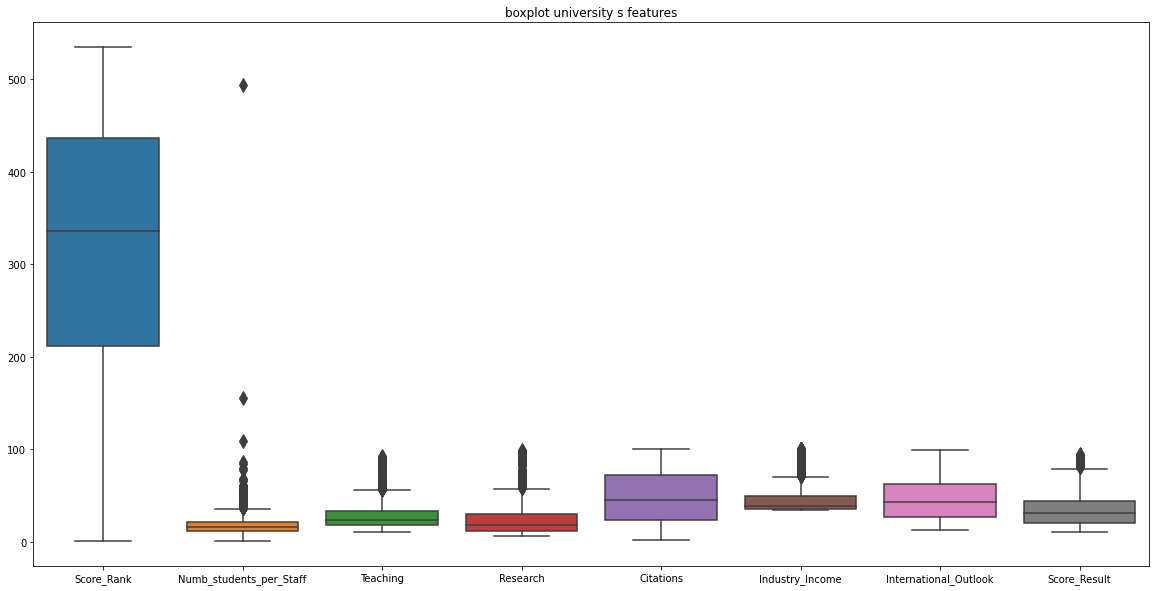

In [9]:
# Boxplot for university
plt.figure(figsize=(20, 10))
plt.title('boxplot university s features')
food_box=sns.boxplot(data=university,fliersize=10) # fliersize is the size used to indicate the outliers
plt.show()

In [83]:
university['Numb_students_per_Staff'].idxmax()
university.loc[1084]

Rank_Char                               1001+
Score_Rank                                447
University                 Anadolu University
Country                                Turkey
Number_students                        830104
Numb_students_per_Staff                 493.5
International_Students                      1
Percentage_Female                          37
Percentage_Male                            63
Teaching                                 13.0
Research                                 24.1
Citations                                16.5
Industry_Income                         100.0
International_Outlook                    17.3
Score_Result                             19.9
Overall_Ranking                     10.7-22.1
Name: 1084, dtype: object

In [90]:
university.drop([1084], inplace=True)

KeyError: '[1084] not found in axis'

In [60]:
university.columns

Index(['Rank_Char', 'Score_Rank', 'University', 'Country', 'Number_students',
       'Numb_students_per_Staff', 'International_Students',
       'Percentage_Female', 'Percentage_Male', 'Teaching', 'Research',
       'Citations', 'Industry_Income', 'International_Outlook', 'Score_Result',
       'Overall_Ranking'],
      dtype='object')

In [92]:
university_selected = university[['Number_students', 'Numb_students_per_Staff',  'International_Students', 'Percentage_Female', 'Percentage_Male', 'Teaching', 'Research',
       'Citations', 'Industry_Income', 'International_Outlook']].copy()

In [93]:
university_selected = university_selected.apply(pd.to_numeric)
university_selected

,Number_students,Numb_students_per_Staff,International_Students,Percentage_Female,Percentage_Male,Teaching,Research,Citations,Industry_Income,International_Outlook
0,20664,11.2,41,46,54,90.5,99.6,98.4,65.5,96.4
1,2240,6.4,30,34,66,92.1,97.2,97.9,88.0,82.5
2,18978,10.9,37,47,53,91.4,98.7,95.8,59.3,95.0
3,16135,7.3,23,43,57,92.8,96.4,99.9,66.2,79.5
4,11247,8.6,34,39,61,90.5,92.4,99.5,86.9,89.0
...,...,...,...,...,...,...,...,...,...,...
1391,20174,17.8,0,55,45,16.2,8.3,6.1,35.6,16.3
1392,34101,21.3,0,57,43,15.3,7.7,6.7,35.1,19.4
1393,15236,11.1,3,63,37,17.0,8.1,4.5,36.9,16.7
1394,17101,24.9,0,54,46,13.8,7.8,7.6,35.0,17.7


In [94]:
university_selected.corr()

,Number_students,Numb_students_per_Staff,International_Students,Percentage_Female,Percentage_Male,Teaching,Research,Citations,Industry_Income,International_Outlook
Number_students,1.000000,0.293929,-0.124829,0.058910,-0.086175,-0.006961,0.012143,-0.022351,-0.043416,-0.037863
Numb_students_per_Staff,0.293929,1.000000,-0.020424,0.104244,-0.042490,-0.127798,0.020016,0.031542,0.025022,0.064010
International_Students,-0.124829,-0.020424,1.000000,0.052493,-0.082259,0.410158,0.496511,0.442434,0.168593,0.826364
Percentage_Female,0.058910,0.104244,0.052493,1.000000,-0.123002,-0.106413,-0.096088,0.084172,-0.287998,0.155173
Percentage_Male,-0.086175,-0.042490,-0.082259,-0.123002,1.000000,-0.023191,-0.046709,-0.127516,0.105180,-0.166370
Teaching,-0.006961,-0.127798,0.410158,-0.106413,-0.023191,1.000000,0.901389,0.538265,0.436603,0.374100
Research,0.012143,0.020016,0.496511,-0.096088,-0.046709,0.901389,1.000000,0.607387,0.509988,0.521201
Citations,-0.022351,0.031542,0.442434,0.084172,-0.127516,0.538265,0.607387,1.000000,0.188653,0.585293
Industry_Income,-0.043416,0.025022,0.168593,-0.287998,0.105180,0.436603,0.509988,0.188653,1.000000,0.158878
International_Outlook,-0.037863,0.064010,0.826364,0.155173,-0.166370,0.374100,0.521201,0.585293,0.158878,1.000000


/tmp/ipykernel_19778/3532090939.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


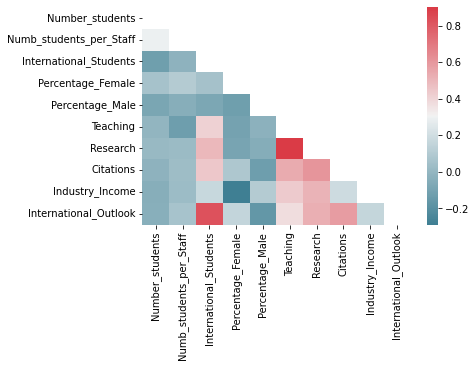

In [95]:
plot_corr(university_selected.corr())

In [96]:
#Should we get rid of those'?
university_selected_aux = university_selected.drop(['Teaching', 'International_Students'], axis=1)

In [97]:
university_selected_aux.corr()

,Number_students,Numb_students_per_Staff,Percentage_Female,Percentage_Male,Research,Citations,Industry_Income,International_Outlook
Number_students,1.000000,0.293929,0.058910,-0.086175,0.012143,-0.022351,-0.043416,-0.037863
Numb_students_per_Staff,0.293929,1.000000,0.104244,-0.042490,0.020016,0.031542,0.025022,0.064010
Percentage_Female,0.058910,0.104244,1.000000,-0.123002,-0.096088,0.084172,-0.287998,0.155173
Percentage_Male,-0.086175,-0.042490,-0.123002,1.000000,-0.046709,-0.127516,0.105180,-0.166370
Research,0.012143,0.020016,-0.096088,-0.046709,1.000000,0.607387,0.509988,0.521201
Citations,-0.022351,0.031542,0.084172,-0.127516,0.607387,1.000000,0.188653,0.585293
Industry_Income,-0.043416,0.025022,-0.287998,0.105180,0.509988,0.188653,1.000000,0.158878
International_Outlook,-0.037863,0.064010,0.155173,-0.166370,0.521201,0.585293,0.158878,1.000000


/tmp/ipykernel_19778/3532090939.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


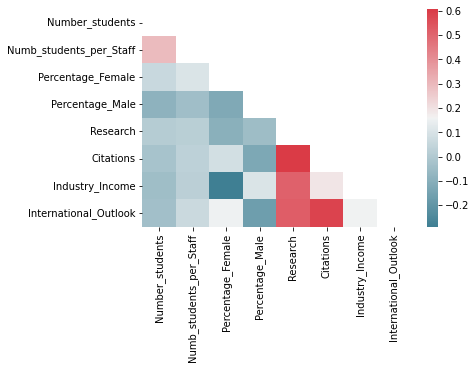

In [98]:
plot_corr(university_selected_aux.corr())

In [99]:
# Standardize features by removing the mean and scaling to unit variance.
from sklearn.preprocessing import StandardScaler

In [100]:
X = university_selected.values

In [101]:
std_scale = StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [102]:
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
from sklearn.decomposition import PCA

In [103]:
pca = PCA().fit(X_scaled)

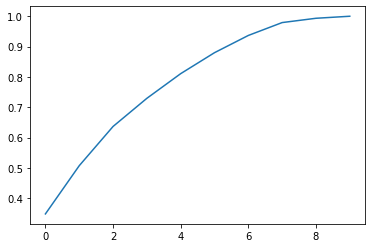

In [104]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [105]:
X_proj = pca.transform(X_scaled)

NameError: name 'data' is not defined

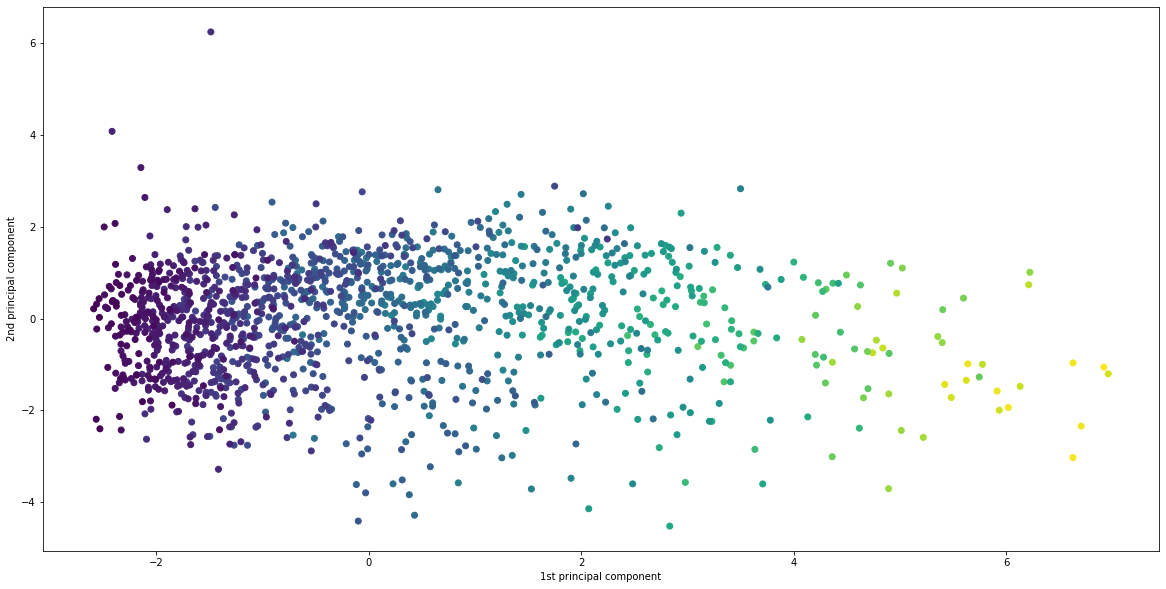

In [111]:
plt.figure(figsize=(20, 10))
plt.scatter(X_proj[:,0], X_proj[:,1], c=university['Score_Result'])
plt.xlabel('1st principal component')
plt.ylabel('2nd principal component')
#plt.xlim(-7, 7)
#plt.ylim(-5, 5)

for i in range(X_proj.shape[0]):
    plt.text(X_proj[i,0], X_proj[i,1], university.index)

In [ ]:
# Is this variance good enough?

In [ ]:
# It seems that PCA is no a good method of visualization


In [39]:
# We apply K-means algorithm and calculate Silhouette index for a given number of clusters
# (Remark: it is a little difficult to visualize, since it is dimension 5)
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]
for n in range_n_clusters:
    kmeans_uni = KMeans(n_clusters=n, n_init=40).fit(university_selected) # Clustering with the given number of clusters
    cluster_labels = kmeans_uni.labels_ # Extract the labels
    silhouette_avg = silhouette_score(university_selected, cluster_labels) # Corresponding silhouette score
   
    # Display the results
    print("For n =", n, "Silhouette_score:", silhouette_avg)

For n = 2 Silhouette_score: 0.9608756171051329
For n = 3 Silhouette_score: 0.8862840342054198
For n = 4 Silhouette_score: 0.6154154680040813
For n = 5 Silhouette_score: 0.6143636018313623
For n = 6 Silhouette_score: 0.5879098716846288
For n = 7 Silhouette_score: 0.557102986374371
For n = 8 Silhouette_score: 0.5493681178623855
For n = 9 Silhouette_score: 0.5390919759244728
For n = 10 Silhouette_score: 0.5375626146819803


In [112]:
university_scaled = pd.DataFrame(scale(university_selected),columns=university_selected.columns,index=university_selected.index)  # scale(food) returns a numpy array, so use pd.Dataframe to reconstruct your dataframe
print(university_scaled)

      Number_students  Numb_students_per_Staff  International_Students  \
0           -0.103401                -0.676055                2.511374   
1           -0.846718                -1.110117                1.577980   
2           -0.171423                -0.703184                2.171958   
3           -0.286124                -1.028731                0.984001   
4           -0.483330                -0.911172                1.917396   
...               ...                      ...                     ...   
1391        -0.123171                -0.079219               -0.967643   
1392         0.438714                 0.237285               -0.967643   
1393        -0.322394                -0.685098               -0.713081   
1394        -0.247151                 0.562832               -0.967643   
1395        -0.562487                 0.626132               -0.797935   

      Percentage_Female  Percentage_Male  Teaching  Research  Citations  \
0             -0.096520         0.39

In [113]:
Z = linkage(university_scaled, 'ward') # 'average' is the method used to compute the distance. Metric is "euclidian" by default
print(Z)

[[1.21400000e+03 1.24800000e+03 1.01385020e-01 2.00000000e+00]
 [1.12900000e+03 1.15700000e+03 2.34465591e-01 2.00000000e+00]
 [7.25000000e+02 7.34000000e+02 2.45525933e-01 2.00000000e+00]
 ...
 [2.75800000e+03 2.76300000e+03 4.42624829e+01 4.72000000e+02]
 [2.75600000e+03 2.76600000e+03 4.91850856e+01 5.37000000e+02]
 [2.76500000e+03 2.76700000e+03 7.45307592e+01 1.38500000e+03]]


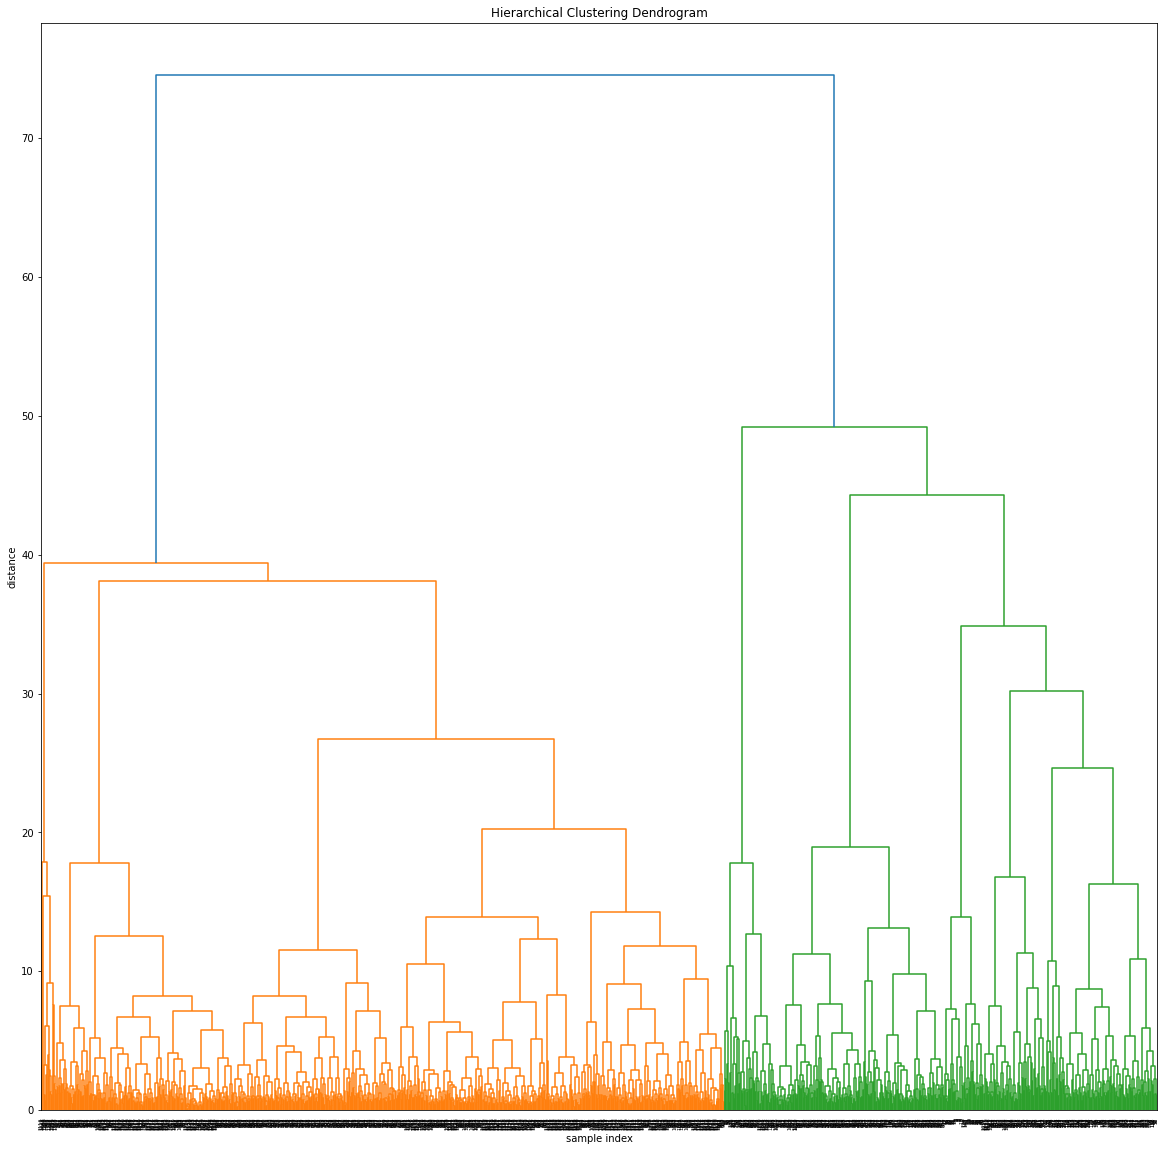

In [116]:
plt.figure(figsize=(20, 20))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z = linkage(university_scaled, 'ward')
)
plt.show()

In [40]:
# We now perform hierarchical clustering. 

# We standardize the columns of interest
university_scaled=pd.DataFrame(scale(university_selected),columns=university_selected.columns,index=university_selected.index)  # scale(food) returns a numpy array, so use pd.Dataframe to reconstruct your dataframe
# print(food_scaled)

# We apply hierarchical clustering with dissimilarity measure "ward"
Z = linkage(university_scaled, 'ward') # 'average' is the method used to compute the distance. Metric is "euclidian" by default
print(Z)

[[1.22200000e+03 1.25600000e+03 1.01097817e-01 2.00000000e+00]
 [1.13700000e+03 1.16500000e+03 2.12256193e-01 2.00000000e+00]
 [7.26000000e+02 7.35000000e+02 2.18032809e-01 2.00000000e+00]
 ...
 [1.08300000e+03 2.77800000e+03 5.31304490e+01 5.47000000e+02]
 [2.77900000e+03 2.78100000e+03 5.36078079e+01 8.46000000e+02]
 [2.78200000e+03 2.78300000e+03 6.93707145e+01 1.39300000e+03]]


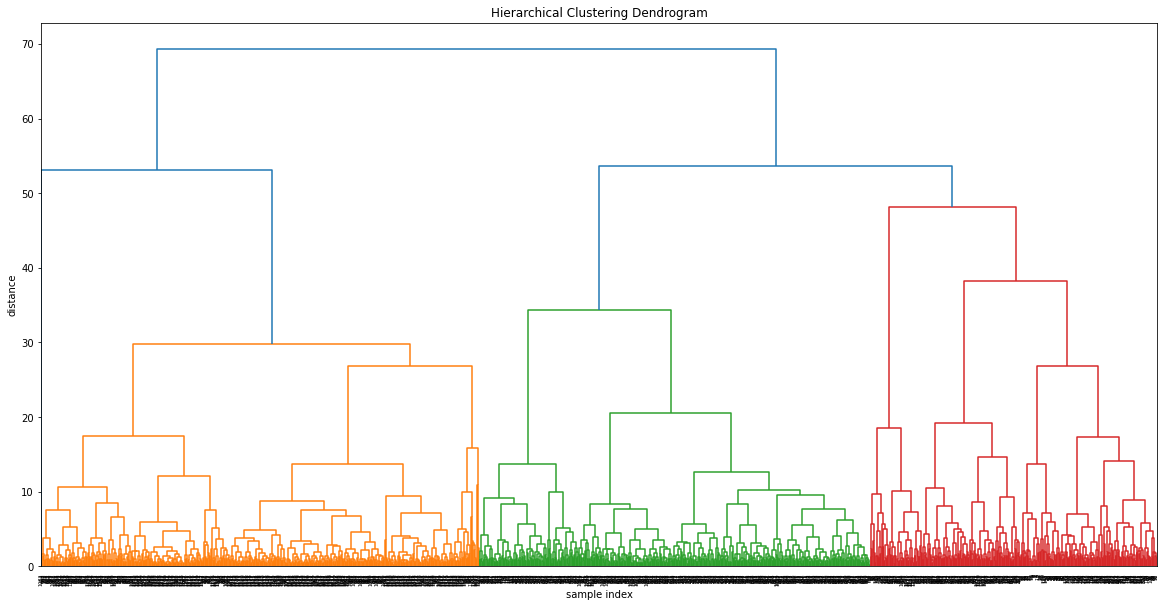

In [44]:
# We represent the corresponding Dendrogram
plt.figure(figsize=(20, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z = linkage(university_scaled, 'ward')
)
plt.show()

In [45]:
from scipy.cluster.hierarchy import fcluster
max_d = 60
clusters = fcluster(Z, max_d, criterion='distance')

In [109]:
clusters

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

In [45]:
university.columns

Index(['Rank_Char', 'Score_Rank', 'University', 'Country', 'Number_students',
       'Numb_students_per_Staff', 'International_Students',
       'Percentage_Female', 'Percentage_Male', 'Teaching', 'Research',
       'Citations', 'Industry_Income', 'International_Outlook', 'Score_Result',
       'Overall_Ranking'],
      dtype='object')

In [110]:
Z

array([[1.22200000e+03, 1.25600000e+03, 1.01097817e-01, 2.00000000e+00],
       [1.13700000e+03, 1.16500000e+03, 2.12256193e-01, 2.00000000e+00],
       [7.26000000e+02, 7.35000000e+02, 2.18032809e-01, 2.00000000e+00],
       ...,
       [1.08300000e+03, 2.77800000e+03, 5.31304490e+01, 5.47000000e+02],
       [2.77900000e+03, 2.78100000e+03, 5.36078079e+01, 8.46000000e+02],
       [2.78200000e+03, 2.78300000e+03, 6.93707145e+01, 1.39300000e+03]])

In [33]:
# We standardize the columns of interest
university_scaled=pd.DataFrame(scale(university),columns=university.columns,index=university.index)  # scale(food) returns a numpy array, so use pd.Dataframe to reconstruct your dataframe


ValueError: could not convert string to float: '201�250'

In [28]:
# Compute the silhouette index for each cluster number
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]
for n in range_n_clusters:
    clusterer = KMeans(n_clusters=n, n_init=40).fit(university) # Clustering with the given number of clusters
    cluster_labels = clusterer.labels_ # Extract the labels
    silhouette_avg = silhouette_score(ruspini, cluster_labels) # Corresponding silhouette score
   
    # Display the results
    print("For n =", n, "Silhouette_score:", silhouette_avg)

ValueError: could not convert string to float: '201�250'